<img src="./../Imagenes/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Practico de Laboratorio N°2: Filtros digitales

## Verificacion de filtro FIR Equiripple diseñado con Matlab

#### Tomas A. Albanesi

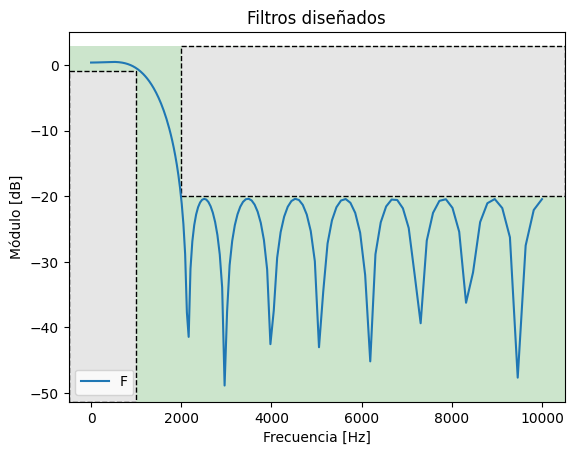

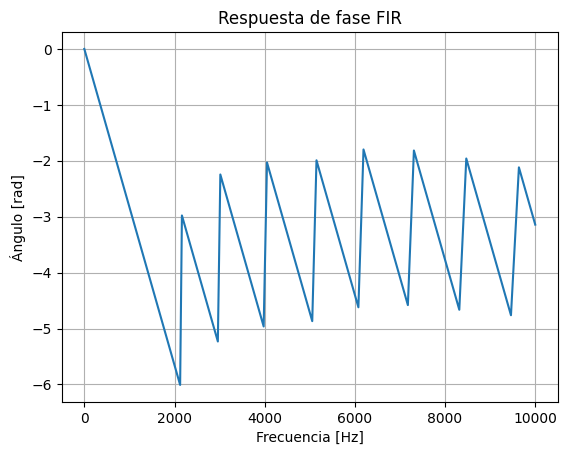

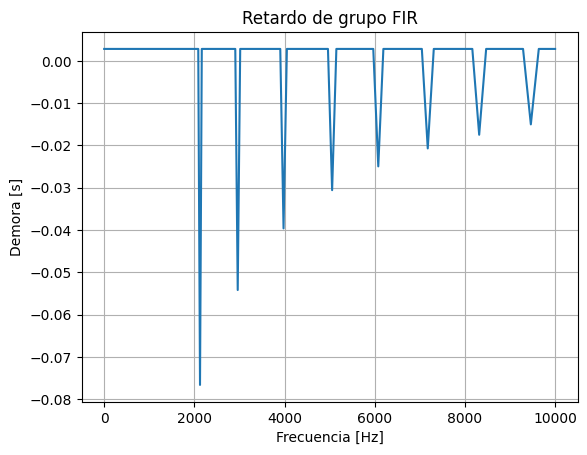

In [1]:
# Importacion de librerias
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, plot_plantilla

# Funcion para obtener el retardo de grupo
def group_delay(ww, phase):
    
    groupDelay = -np.diff(phase)/np.diff(ww)
    
    return(np.append(groupDelay, groupDelay[-1]))

# Plantilla
f_pass = 1e3
f_stop = 2e3
at_pass = 1
at_stop = 20
fs = 40e3
f_nyq = fs/2

# Coeficientes
num_fir = np.array([-0.05162433733236522,-0.007672519422928516,-0.00678880781242267,-0.004898142125166312,-0.0018130222403740636,0.0023430473577484546,0.007554643562306183,0.013839970332732366,0.02085058754485809,0.02841826251623787,0.0363856965421772,0.04440887725675523,0.052207713769222654,0.05945363169895248,0.06583915761165324,0.07108412576908336,0.07503778800290847,0.07746972104699341,0.078299568689035,0.07746972104699341,0.07503778800290847,0.07108412576908336,0.06583915761165324,0.05945363169895248,0.052207713769222654,0.04440887725675523,0.0363856965421772,0.02841826251623787,0.02085058754485809,0.013839970332732366,0.007554643562306183,0.0023430473577484546,-0.0018130222403740636,-0.004898142125166312,-0.00678880781242267,-0.007672519422928516,-0.05162433733236522])
den_fir = 1

# Vector de frecuencias
w = np.logspace(-4, 4, 1000) / f_nyq * np.pi

# Respuesta en frecuencia
_, h = sig.freqz(num_fir, den_fir, w)

w = w / np.pi * f_nyq

# Modulo
plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.plot(w, 20 * np.log10(np.abs(h)), label='FIR')
plt.legend('FIR')
plot_plantilla(filter_type = 'lowpass', fpass = f_pass, ripple = at_pass , fstop = f_stop, attenuation = at_stop, fs = fs)

# Fase
plt.figure()
plt.title('Respuesta de fase FIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [rad]')
fase_fir = np.unwrap(np.angle(h))
plt.plot(w, fase_fir)
plt.grid(which='both', axis='both')


# Retardo de grupo
gd_iir = group_delay(w, fase_fir)
plt.figure()
plt.title('Retardo de grupo FIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Demora [s]')
plt.plot(w, gd_iir)
plt.grid(which='both', axis='both')